In [1]:
setwd('/import/jliu//data2/scrna/')

In [2]:
data = read.table('../../DINGWEI.txt',header =T,sep = '\t')

In [3]:
head(data,6)

,type,TXN,JCHAIN,BCL2A1,FAM200B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Centrosome,-1.484270,-1.355196,-1.462907,-1.426016
2,Cytoplasm,1.447357,-1.343180,-0.506404,-0.828412
3,Cytoskeleton,-1.429419,-1.793401,-1.929956,-1.953051
4,Endosome,-2.453250,-2.892383,-1.700879,-3.810333
5,Endoplasmic.reticulum,-0.840983,-2.382853,-1.233204,-1.129962
6,Extracellular,-1.864481,1.971366,-1.064741,-4.159886


In [5]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


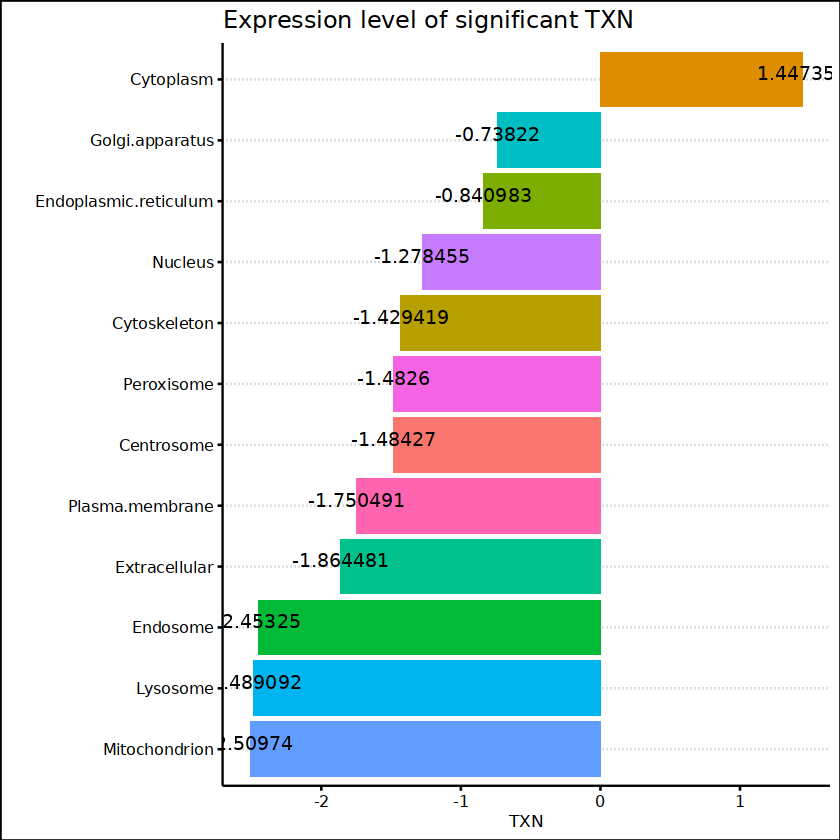

In [8]:
library(ggthemes)
ggplot(data,aes(x = reorder(type,TXN),y=TXN,
           fill = type,
           label = TXN))+
    geom_col(show.legend = FALSE) +
    coord_flip() +
    geom_text(nudge_x = 0.1) +
    xlab('') +
    ggtitle('Expression level of significant TXN')+
    theme_clean()

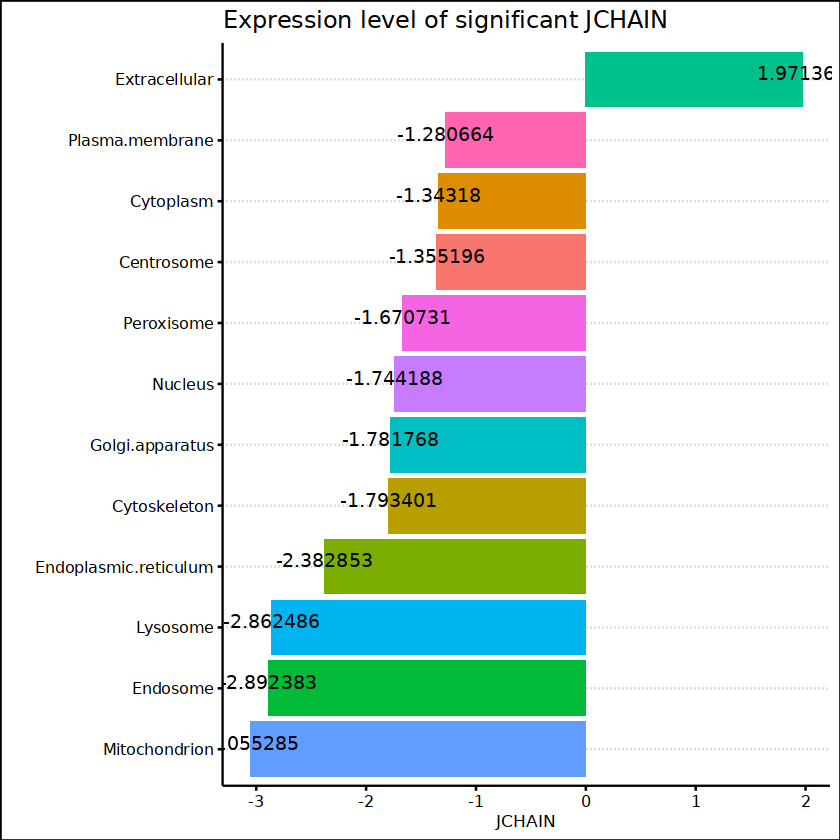

In [10]:
library(ggthemes)
ggplot(data,aes(x = reorder(type,JCHAIN),y=JCHAIN,
           fill = type,
           label = JCHAIN))+
    geom_col(show.legend = FALSE) +
    coord_flip() +
    geom_text(nudge_x = 0.1) +
    xlab('') +
    ggtitle('Expression level of significant JCHAIN')+
    theme_clean()

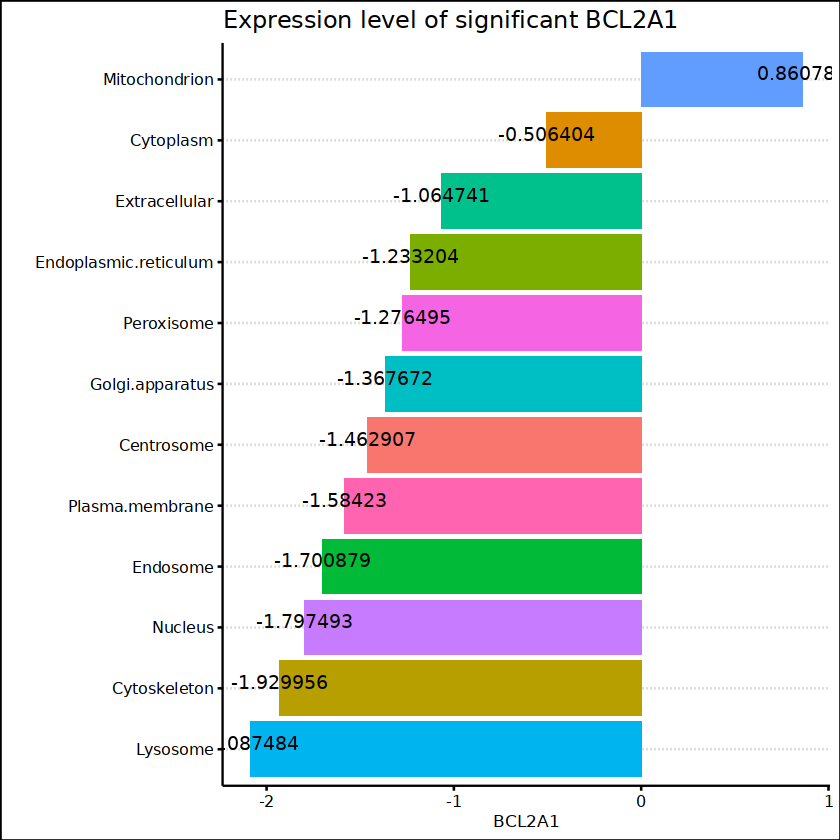

In [11]:
library(ggthemes)
ggplot(data,aes(x = reorder(type,BCL2A1),y=BCL2A1,
           fill = type,
           label = BCL2A1))+
    geom_col(show.legend = FALSE) +
    coord_flip() +
    geom_text(nudge_x = 0.1) +
    xlab('') +
    ggtitle('Expression level of significant BCL2A1')+
    theme_clean()

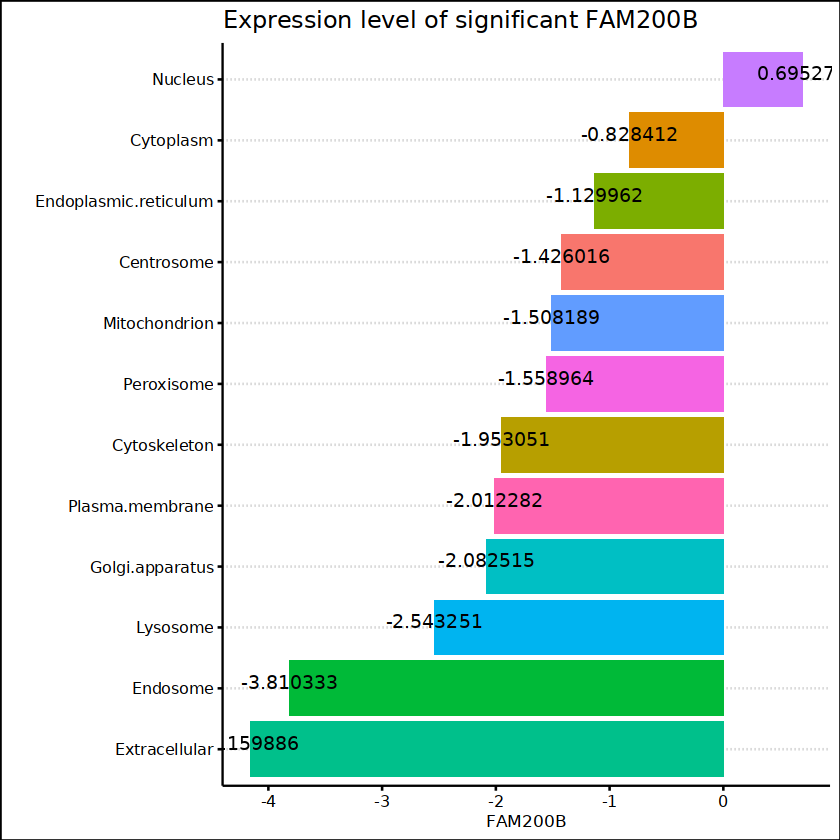

In [12]:
library(ggthemes)
ggplot(data,aes(x = reorder(type,FAM200B),y=FAM200B,
           fill = type,
           label = FAM200B))+
    geom_col(show.legend = FALSE) +
    coord_flip() +
    geom_text(nudge_x = 0.1) +
    xlab('') +
    ggtitle('Expression level of significant FAM200B')+
    theme_clean()

In [14]:
getwd()

[1] "/import/jliu/data2/scrna"

In [23]:
library(openxlsx)
data<- read.xlsx("../res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)

In [24]:
head(data,2)

,Gene_name,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
2,ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


In [25]:
data = data[!duplicated(data$Gene_name),]

In [26]:
library(linkET)

In [34]:
expr1 = data %>% filter(Gene_name %in% c('FAM200B','BCL2A1','IGJ','TXN')) %>%  tibble::remove_rownames() %>% 
tibble::column_to_rownames(.,'Gene_name') %>% t() %>% as.data.frame() 

In [35]:
head(expr1,2)

,TXN,IGJ,FAM200B,BCL2A1
,<dbl>,<dbl>,<dbl>,<dbl>
C10,7.655688,21.40125,4.886505,22.32717
C11,17.794071,21.30293,6.201921,32.12134


In [ ]:
expr1 = data %>% filter(Gene_name %in% c('FAM200B','BCL2A1','IGJ','TXN')) %>%  tibble::remove_rownames() %>% 
tibble::column_to_rownames(.,'Gene_name') %>% t() %>% as.data.frame() 

In [37]:
checki = read.table('./checkimmu.txt',header =F)

In [38]:
gene = checki$V1

In [39]:
expr2 = data %>% filter(Gene_name %in% gene) %>%  tibble::remove_rownames() %>% 
tibble::column_to_rownames(.,'Gene_name') %>% t() %>% as.data.frame() 

In [40]:
head(expr2,2)

,TNFSF9,TNFSF4,TNFSF15,TNFSF14,TNFRSF9,TNFRSF8,TNFRSF25,TNFRSF14,TIGIT,PDCD1LG2,...,CD86,CD48,CD44,CD40,CD28,CD276,CD274,CD200R1,CD200,C10orf54
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C10,0.06244118,2.335969,0.3147624,17.80428,3.397495,4.082689,12.358764,22.07720,5.962277,0.2353423,...,17.43522,69.44686,71.89586,6.051481,24.05006,0.07467704,1.851188,4.795690,1.833382,176.3022
C11,0.57962415,2.218426,0.1089287,16.12199,1.305784,3.583620,9.160292,19.54021,12.656005,2.5295569,...,17.86174,69.98670,70.60826,5.443445,19.00903,0.00000000,9.425702,3.313861,1.098531,146.3151


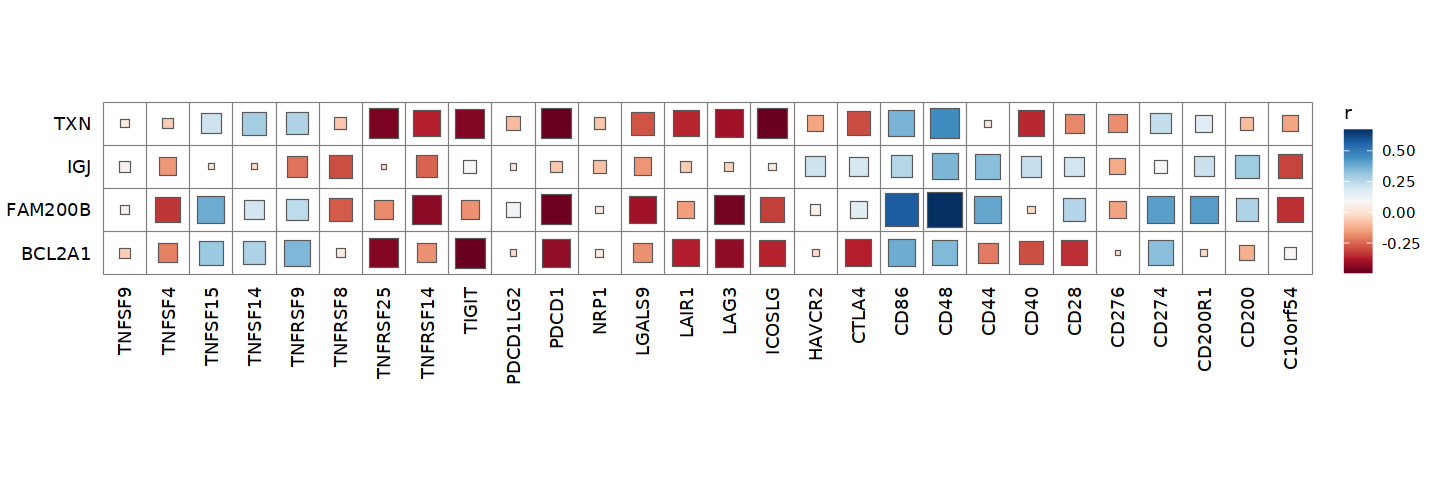

In [46]:
cor_res <- correlate(expr1, expr2,method = "spearman")
  
qcorrplot(cor_res) +
  geom_square() +
  scale_fill_gradientn(colours = RColorBrewer::brewer.pal(11, "RdBu"))

In [47]:
options(repr.plot.width = 12,repr.plot.height = 4)

In [56]:
library(tidyr)
library(tibble)

Warning message:
"package 'tibble' was built under R version 4.2.3"


In [57]:
# 先整理下数据
df_r <- cor_res$r %>% 
  as.data.frame() %>% 
  rownames_to_column(var = "gene") %>% 
  pivot_longer(-1,names_to = "cell_type",values_to = "correlation")

df_p <- cor_res$p %>% 
  as.data.frame() %>% 
  rownames_to_column(var = "gene") %>% 
  pivot_longer(-1,names_to = "cell_type",values_to = "pvalue")

df_cor <- df_r %>% 
  left_join(df_p) %>% 
  mutate(stars = cut(pvalue,breaks = c(-Inf,0.05,0.01,0.001,Inf),right = F,labels = c("***","**","*"," ")))
## Joining with `by = join_by(gene, cell_type)`

head(df_cor)

Joining with `by = join_by(gene, cell_type)`


gene,cell_type,correlation,pvalue,stars
<chr>,<chr>,<dbl>,<dbl>,<fct>
TXN,TNFSF9,0.03763608,0.75021283,
TXN,TNFSF4,-0.05791929,0.62330156,
TXN,TNFSF15,0.21196594,0.06994019,
TXN,TNFSF14,0.28805628,0.01307417,*
TXN,TNFRSF9,0.26921881,0.02064036,*
TXN,TNFRSF8,-0.07305442,0.53539466,


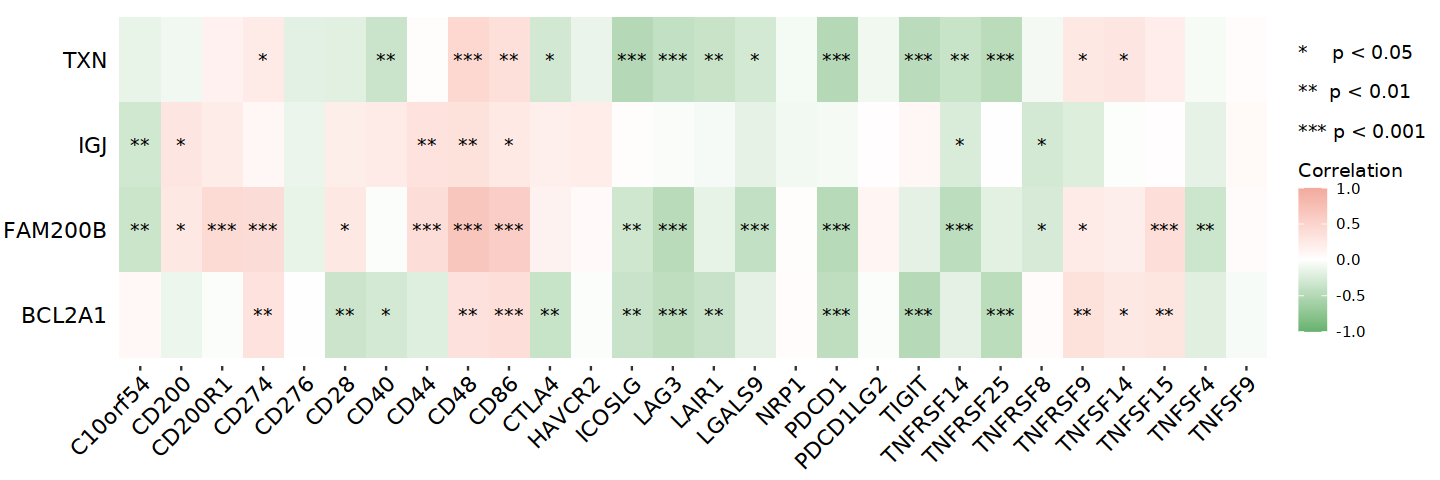

In [58]:
library(ggplot2)

ggplot(df_cor, aes(cell_type,gene))+
  geom_tile(aes(fill=correlation))+
  geom_text(aes(label=stars), color="black", size=4)+
  scale_fill_gradient2(low='#67B26F', high='#F2AA9D',mid = 'white',
                      limit=c(-1,1),name=paste0("*    p < 0.05","\n\n","**  p < 0.01","\n\n","*** p < 0.001","\n\n","Correlation"))+
  labs(x=NULL,y=NULL)+
  theme(axis.text.x = element_text(size=13,angle = 45,hjust = 1,color = "black"),
        axis.text.y = element_text(size=13,color = "black"),
        axis.ticks.y = element_blank(),
        panel.background=element_blank())

### 